In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import scipy as sp
import sklearn
import mglearn

## 분류형 선형모델

- 선형 모델은 분류에서도 널리 사용한다.

    이진 분류 : y(hat) = w[0] X x[0] + w[1]Xx[1] + w[2]Xx[2] + w[3]Xx[3]+...+w[p]Xx[p]+b>0
    
 - 이 방정식은 선형 회귀와 아주 비슷. 하지만 특성들의 가중치 합을 그냥 사용하는 대신 예측한 값을 임계치 0과 비교한다.
     
     if 함수에서 계산한 값 < 0 : 
         -1 
     else:
         +1
         
- 이 규칙은 분류에서 쓰이는 모든 선형모델에서 동일. 여기에서도 계수(w)와 절편(b)를 찾기 위한 방법이 많이 있다.

- 회귀용 선형 모델에서는 출력 y(hat)이 특성의 선형 함수. 즉 직선, 평면, 초평면(차원이 3이상 일 때)

- 분류형 선형 모델에서는 결정 경계가 입력의 선형 함수


- ---> 다른 말로 하여서 (이진) 선형 분류기는, 선, 평면, 초평면을 사용해서 두 개의 클래스를 구분하는 분류기



선형 모델을 학습시키는 알고리즘은 다양한데, 다음의 두 방법으로 구분
1. 특정 계수와 절편의 조합이 훈련 데이터에 얼마나 잘 맞는지 측정하는 방법
2. 사용할 수 있는 규제가 있는지, 있다면 어떤 방식인지

    알고리즘들은 훈련 세트를 잘 학습하는지 측정하는 방법이 각기 다르다. 불행하게도 수학적이고 기술적인 이유로, 알고리즘들이 만드는 잘못된 분류의 수를 최소화하도록 w와 b를 조정하는 것은 불가능하다. 많은 애플리케이션에서 앞 목록의 첫 번째 항목(손실함수)에 대한 차이는 크게 중요하지 않다



* 가장 널리 알려진 두개의 선형 분류 알고리즘 : 로지스틱 회귀, 서포트 벡터 머신(SVC)
    
     로지스틱 회귀(logistic regression) : linear_model.LogisticRegression에 구현되어 있다.

C:\app\Python38\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


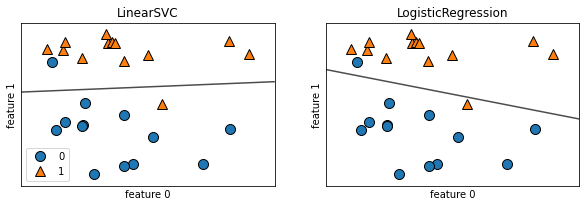

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge() # 데이터 생성

fig, axes = plt.subplots(1, 2, figsize=(10,3)) # 그리드 생성

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes): # 반복문으로 SVC랑 로지스틱 회귀 분류 모델 생성
    clf = model.fit(X,y) # 각 모델 학습
    mglearn.plots.plot_2d_separator(clf,X,fill=False, eps=0.5,
                                   ax=ax, alpha=.7) # 학습된 모델 기반의 분류선 생성
    mglearn.discrete_scatter(X[:,0], X[:,1],y, ax=ax) # 산점도 생성(x축은 특성 1, y축은 특성 2, 각 색깔에 따라 클래스 다름)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend()

- 이 모델은 비슷한 결정 경계를 생성하였다. 그리고 똑같이 포인트 두개를 잘못 분류하였다. 이 두 모델은 Ridge와 마찬가지로 L2규제 사용



- 두 분류기에서 규제의 강도를 결정하는 매개변수 = C (C의 값이 높아지면 규제 감소, 매개변수로 높은 C값을 지정하면 LogisticRegression과 LinearSVC는 훈련 세트에 가능한 최대로 맞추려하고, 반면에 C값을 낮추면 모델은 계수 벡터(w)가 0에 가까워지도록 만든다.



- 다르게 해석하면? 알고리즘은 C의 값이 낮아지면 데이터 포인트 중 다수에 맞추려고 하는 반면, C의 값을 높이면 개개의 데이텊 ㅗ인트를 정확히 분류하려고 노력할 것이다.



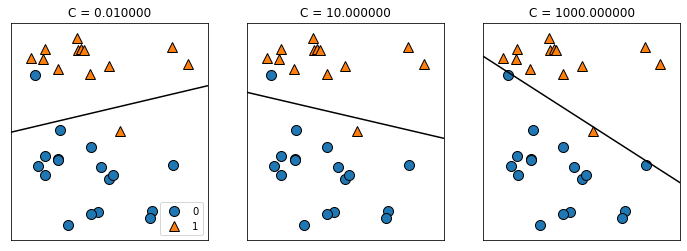

In [7]:
mglearn.plots.plot_linear_svc_regularization()

---> forge 데이터셋에 각기 다른 C 값으로 만든 선형 SVM 모델의 결정 경계

###### 회귀와 비슷하게 분류에서의 선형 모델은 낮은 차원의 데이터에서는 결정 경계가 직선이거나 평면이어서 매우 제한적인 것처럼 보인다. 하지만 고차원에서는 분류에 대한 선형 모델이 매우 강력해지며 특성이 많아지면 과대적합되지 않도록 하는 것이 매우 중요해진다.

In [11]:
#유방암 데이터셋을 사용한 Logistic Regression 자세히 분석
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer() # 데이터 로드
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state = 42) # 훈련 데이터 테스트 데이터 나누기
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train) # 분류모델 생성 및 훈련데이터 학습
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train))) # 훈련 셋 정확도 측정
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test))) # 테스트 셋 정확도 측청

훈련 세트 점수: 0.958
테스트 세트 점수: 0.958


- 기본값 C=1이 둘 모두에 훌륭한 성능을 내고 있다. But 매우 둘이 비슷하므로 과소적합인 듯. 모델의 제약을 더 풀어주자 !
- 그러면, C를 높여야겠지

In [12]:
logreg100 = LogisticRegression(C=100,max_iter=5000).fit(X_train, y_train) # 분류모델 생성 및 훈련데이터 학습
print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train, y_train))) # 훈련 셋 정확도 측정
print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test, y_test))) # 테스트 셋 정확도 측청

훈련 세트 점수: 0.984
테스트 세트 점수: 0.965


* C=100을 사용하니 훈련 세트의 정확도가 높아졌고 테스트 세트의 정확도도 조금 증가하였다 ! 이는 복잡도가 높은 모델일수록 성능이 좋음을 말해준다.
* 규제를 한번 강하게 해볼까, C를 낮춰보자.

In [14]:
logreg001 = LogisticRegression(C=0.01,max_iter=5000).fit(X_train, y_train) # 분류모델 생성 및 훈련데이터 학습
print("훈련 세트 점수: {:.3f}".format(logreg001.score(X_train, y_train))) # 훈련 셋 정확도 측정
print("테스트 세트 점수: {:.3f}".format(logreg001.score(X_test, y_test))) # 테스트 셋 정확도 측청

훈련 세트 점수: 0.953
테스트 세트 점수: 0.951


- 훈련 세트와 테스트 세트의 정확도가 기본 매개변수 (C=1)일 때보다 낮아진다.

### 규제 매개변수 C 설정을 세가지로 다르게 하여 학습시킨 모델의 계수 확인

C:\app\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\app\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\app\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 53356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\app\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\app\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\app\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\app\P

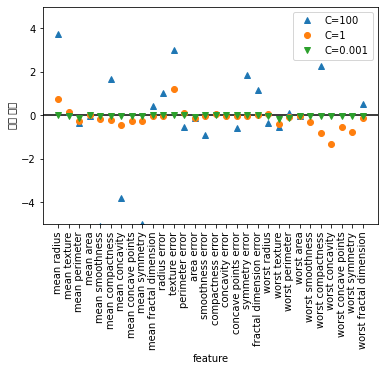

In [23]:
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T,'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0],xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("feature")
plt.ylabel("계수 크기")
plt.legend()

- 이는 L2규제와 비슷한 양상을 보인다.
- mean perimeter에서 C=100, C=1일 때 이 계수는 음수지만, C=0.001일 때는 양수가 되며 C=1일 때보다도 절댓값이 더 크다.
- 이와 같은 모델을 해석하면 계수가 클래스와 특성의 연관성을 알려줄 수 있다. 예를 들면 높은 "texture error"특성은 약성인 샘플과
- 관련이 깊다. 그러나 "mean perimeter" 계수의 부호가 바뀌는 것으로 보아 높은 "mean perimeter"값은 양성이나 악성의 신호 모두가
- 될 수 있다. 그래서 선형 모델의 계수는 항상 의심해봐야하고 조심해서 해석해야 한다.

### L1 규제 : 더 이해하기 쉬운 모델

C=0.001 인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도: 0.92
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.98


C:\app\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\app\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\app\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\app\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\app\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 53356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\app\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\a

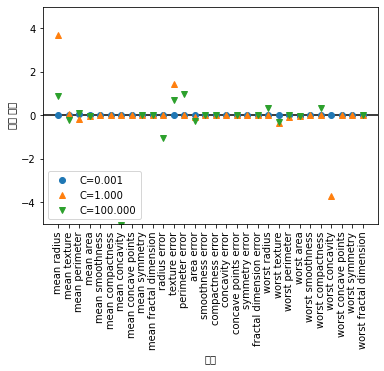

In [51]:
for C, marker in zip([0.001, 1, 100],['o','^','v']):
    lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty="l1", max_iter=1000).fit(X_train,y_train)
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(C,lr_l1.score(X_train,y_train)))
    
    print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(C,lr_l1.score(X_test,y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5, 5)
plt.legend(loc=3)

## 다중 클래스 분류용 선형 모델

(로지스틱 회귀만 제외하고) 많은 선형 분류 모델은 태생적으로 이진 분류만을 지원한다.
즉, 다중 클래스를 지원하지 않는다. 이진 분류 알고리즘을 다중 클래스 분류 알고리즘으로 확장하는 보편적인 기법은 일대다 기법이다.
일대다 방식은 각 클래스를 다른 모든 클래스와 구분하도록 이진 분류 모델을 학습시킨다.
결국 클래스의 수만큼 이진 분류 모델이 만들어진다.
예측을 할 때 이렇게 만들어진 모든 이진 분류기가 작동하여 가장 높은 점수를 내는 분류기의 클래스를 예측값으로 선택한다.



클래스별 이진 분류기를 만들면 각 클래스가 계수 벡터(w)와 절편 (b)을 하나씩 가지게 된다. 결국 분류 신뢰도를 나타내는 다음 공식의 결괏값이 가장 높은 클래스가 해당 데이터의 클래스 레이블로 할당된다.

w[0]Xx[0]+w[1]Xx[1]Xw[2]Xx[2]+...+w[p]Xx[p]+b

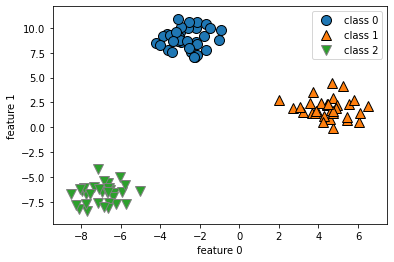

In [58]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42) # 데이터셋 로드
mglearn.discrete_scatter(X[:,0], X[:, 1], y) # 산점도 출력(x축은 특성1, y축은 특성2, 각 범례는 클래스별로(y))
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(["class 0","class 1","class 2"])

In [59]:
#위 데이터셋으로 LinearSVC 분류기 훈련해보기
linear_svm = LinearSVC().fit(X, y) # LinearSVC 분류기로 훈련데이터 셋 학습
print("계수 배열의 크기: ", linear_svm.coef_.shape)
print("절편 배열의 크기: ", linear_svm.intercept_.shape)


계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


In [60]:
linear_svm.coef_

array([[-0.17492462,  0.23141052],
       [ 0.47621543, -0.06937359],
       [-0.18914304, -0.20399683]])

In [61]:
linear_svm.intercept_

array([-1.07745493,  0.13140209, -0.08604839])

C:\app\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\app\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\app\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\app\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47000 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\app\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\app\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\a

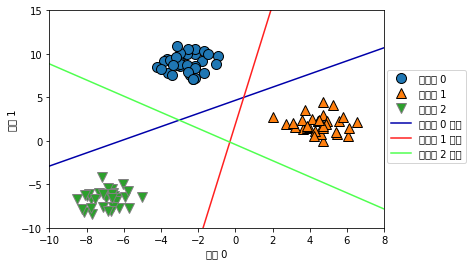

In [66]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y) # 산점도
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                 mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0', '클래스 1','클래스 2','클래스 0 경계','클래스 1 경계','클래스 2 경계'], loc = (1.01, 0.3))